# 10 Speakers with new API

A demonstration of using fastai with audio.

Generating spectrograms with, as of (May 2019), some good transformations to help reduce overfitting.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("..")
from audio import *

In [17]:
data_url = 'http://www.openslr.org/resources/45/ST-AEDS-20180100_1-OS'
data_folder = datapath4file(url2name(data_url))
untar_data(data_url, dest=data_folder)

PosixPath('/home/h/.fastai/data/ST-AEDS-20180100_1-OS/ST-AEDS-20180100_1-OS')

In [83]:
label_pattern = r'_([mf]\d+)_'
config = AudioTransformConfig()
config.segment_size = 2000
# config.resample_to = 8000
config.remove_silence = True
# config.force_cache = True
config.f_max = 8000
config.silence_threshold = 30
config.max_to_pad = 2000
config.silence_padding = 300
audios = AudioList.from_folder(data_folder, config=config).split_by_rand_pct(.2, seed=4).label_from_re(label_pattern)
audios

2
23520
3
22400
2
21600
2
26400
2
22720
2
24000
2
24000
1
24640
2
28640
3
22400
2
19200
1
28800
2
18080
1
24000
2
21600
1
13440
2
28800
2
27040
2
21600
2
19200
1
28800
2
16800
2
21600
2
28800
2
26400
3
25600
2
23200
3
22400
2
19200
2
26400
2
19200
3
24000
2
24000
3
21654
2
21600
2
17280
2
28800
2
23680
1
14400
2
28160
2
27840
2
31200
1
28800
2
21600
2
21600
1
28800
2
31200
3
24000
2
20960
1
28480
2
19200
3
28800
2
16800
2
26400
3
22187
3
22400
2
18080
1
24000
3
23360
2
21600
2
21600
2
25120
2
16800
2
24000
2
19200
2
24000
2
28800
1
29120
2
21120
2
24000
1
11840
2
26400
2
31200
2
27040
1
19200
2
16800
2
24000
2
25760
3
30400
2
26400
2
19200
2
27680
2
26400
3
22400
2
26400
2
24000
3
22400
2
21600
2
23360
2
20800
2
24000
2
25280
3
27200
1
25280
2
28800
2
28800
2
23360
2
21600
2
17280
2
28800
2
31200
2
28800
2
21600
2
21600
2
21600
2
16800
3
22400
2
28800
2
21600
1
28160
2
28800
2
21280
2
21600
2
16800
2
20960
2
21280
2
19200
2
19200
2
31200
1
28800
1
28800
2
31200
4
25200
2
16800
2
19200


23574
3
24000
2
21600
1
30080
2
24000
2
19200
2
22080
2
20480
2
24000
3
22614
1
1920
2
24000
2
20960
2
26400
1
7040
2
31040
2
24000
2
19200
2
28800
2
19200
1
14400
2
19200
2
30080
2
24000
2
19200
2
26400
2
26400
2
24000
2
21600
2
19200
2
28800
2
26400
2
31200
2
16800
1
19200
2
21600
2
19200
2
25760
2
26400
2
21600
2
16800
2
24000
2
24000
2
25600
2
18720
2
24000
1
28800
2
24000
3
22400
2
21600
2
21600
2
31200
3
26880
2
19200
1
6400
2
27520
2
22080
3
22400
2
19200
2
21600
2
24320
2
21600
2
24000
2
23360
2
19200
2
30720
3
22934
2
19200
2
24000
2
31200
2
19200
1
28160
2
28800
2
16800
1
24640
2
26400
2
23520
2
21600
2
21600
3
22400
1
19200
2
20960
2
19200
1
14400
1
14400
2
20000
2
16800
2
18880
2
26400
2
21600
1
31360
2
16160
3
21547
2
16800
2
26400
2
21600
2
16800
2
16800
2
28000
2
16800
2
19200
1
29760
2
18880
2
16800
2
31200
3
30400
2
26400
2
19200
2
21600
2
19200
2
16800
2
19200
2
27840
2
19200
2
24000
2
19200
2
25920
2
18880
2
16800
2
26400
1
28800
2
24000
2
18400
3
25600
3
22400
2
288

2
19200
2
19200
1
28800
2
28800
2
16800
1
12160
2
19200
1
28800
2
21600
1
28800
2
27520
1
30080
3
25600
1
6080
2
28800
2
19200
2
25440
2
21600
1
6720
2
29760
2
19200
1
28800
2
24000
2
24000
1
28800
1
19200
1
19200
1
14400
2
28800
2
20800
2
24000
3
22187
2
19200
2
16800
2
16800
1
22720
3
25600
2
26400
2
19200
2
18240
1
14400
2
21600
2
29440
2
24000
2
24160
2
16800
3
27094
2
31200
2
31200
2
28640
3
22400
2
28800
3
21547
2
28800
1
24000
2
21600
2
24000
2
28800
2
19200
2
23200
2
28800
2
19200
2
16800
2
19200
1
6400
2
16800
2
16800
2
31200
2
24000
2
24000
1
13440
2
19680
2
28800
2
21600
2
19200
2
16800
1
28800
1
24000
2
31200
2
16800
2
16800
2
27360
2
27840
2
26400
2
28800
2
24000
2
25760
2
28800
2
19200
3
22400
3
25600
2
21600
2
16320
2
16800
2
28800
2
16800
1
28800
2
31200
2
28800
2
16800
3
24000
1
27200
4
24000
3
23147
3
25600
1
12480
2
19200
3
21654
2
23680
2
25920
2
31200
2
16800
2
23360
2
28800
2
19200
2
28800
2
28800
2
16800
2
16800
2
27840
2
21760
2
23360
2
19200
2
16800
2
22560
3
2

4
24800
2
24000
2
22240
1
28800
1
19200
2
16640
2
28000
2
24480
2
19200
1
14400
1
2560
1
14400
2
24000
2
28320
3
24000
2
16800
2
16480
2
19200
3
22400
2
21600
1
23680
3
24000
3
28800
2
16800
3
22400
2
16320
2
20640
2
16800
3
27200
3
22400
2
19200
2
19200
3
22400
2
16800
2
19200
2
16800
1
19200
1
14400
2
24000
2
24000
1
25600
2
18560
2
19200
2
24000
2
28800
4
24000
1
14400
1
28800
1
14400
1
28160
2
16800
2
28800
2
19200
1
14400
2
25120
2
16800
2
24000
1
14400
2
24000
2
31200
2
24000
1
31360
2
24000
3
25600
2
19200
2
21600
1
28800
2
28800
1
10880
2
19200
2
21600
2
28800
2
19200
2
21600
2
26400
2
24000
2
31200
1
15680
3
25600
2
21600
2
16800
1
25920
2
31200
2
31200
3
22400
2
26400
3
24000
2
21600
3
22400
2
21600
2
21600
2
21600
2
16800
2
31520
3
22400
1
24000
1
28800
2
28800
2
19200
2
21600
1
28800
2
16800
2
28800
3
22080
2
21600
2
28800
3
24000
2
20480
2
16800
2
18880
2
17760
1
29120
2
24000
2
21600
4
25040
2
19200
2
24000
2
19200
1
28800
2
20960
2
21600
2
28800
2
19200
2
19200
1
28800
2

LabelLists;

Train: AudioLabelList (6683 items)
x: AudioList
AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz)
y: CategoryList
f0004,f0004,m0003,m0003,m0003
Path: /home/h/.fastai/data/ST-AEDS-20180100_1-OS;

Valid: AudioLabelList (1656 items)
x: AudioList
AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz),AudioItem 2.0 seconds (32000 samples @ 16000hz)
y: CategoryList
f0001,f0001,f0004,f0004,f0001
Path: /home/h/.fastai/data/ST-AEDS-20180100_1-OS;

Test: None

In [77]:
for i in range(4):
    print(audios.train[i][0])
# x.show()
# y

AudioItem 1.47 seconds (23520 samples @ 16000hz)
AudioItem 1.47 seconds (23520 samples @ 16000hz)
AudioItem 1.4 seconds (22400 samples @ 16000hz)
AudioItem 1.4 seconds (22400 samples @ 16000hz)


f0004


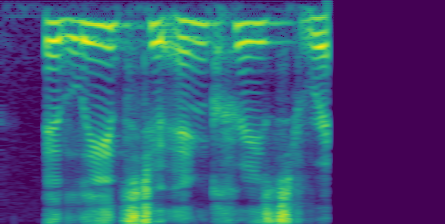

f0004


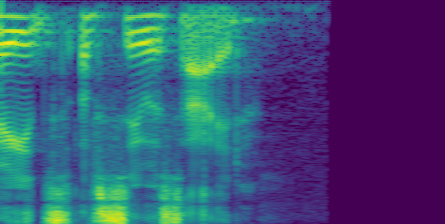

m0003


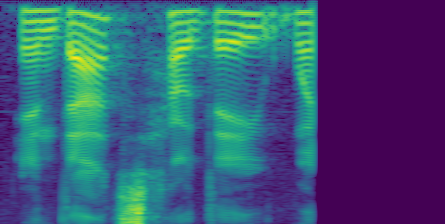

AudioDataBunch;

Train: AudioLabelList (6683 items)
x: AudioList
AudioItem 1.47 seconds (23520 samples @ 16000hz),AudioItem 1.47 seconds (23520 samples @ 16000hz),AudioItem 1.4 seconds (22400 samples @ 16000hz),AudioItem 1.4 seconds (22400 samples @ 16000hz),AudioItem 1.4 seconds (22400 samples @ 16000hz)
y: CategoryList
f0004,f0004,m0003,m0003,m0003
Path: /home/h/.fastai/data/ST-AEDS-20180100_1-OS;

Valid: AudioLabelList (1656 items)
x: AudioList
AudioItem 1.39 seconds (22240 samples @ 16000hz),AudioItem 1.39 seconds (22240 samples @ 16000hz),AudioItem 1.8 seconds (28800 samples @ 16000hz),AudioItem 1.2 seconds (19200 samples @ 16000hz),AudioItem 1.04 seconds (16640 samples @ 16000hz)
y: CategoryList
f0001,f0001,f0004,f0004,f0001
Path: /home/h/.fastai/data/ST-AEDS-20180100_1-OS;

Test: None

In [74]:
# tfm_sg_shift.use_on_y = False
# tfm_sg_aug.use_on_y = False
# tfms = [tfm_sg_aug], []
db = audios.databunch(bs=128)
db.show_batch()
learn = audio_learner(db)
db

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


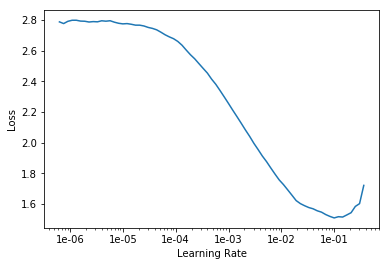

In [70]:
learn.lr_find()
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(2, slice(1e-4, 4e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.858840,0.290947,0.907173,00:12
1,0.306984,0.102837,0.967450,00:10


[('f0003', 'f0002', 11),
 ('f0003', 'f0001', 9),
 ('m0002', 'm0005', 5),
 ('m0002', 'm0003', 4),
 ('m0004', 'm0003', 4)]

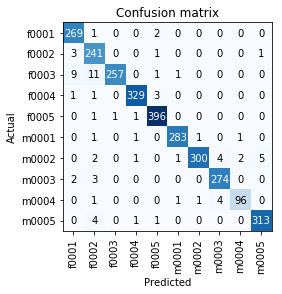

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()[:5]

In [59]:
preds = audio_predict(learn, data_folder.ls()[500])
preds

'f0002'